<a href="https://colab.research.google.com/github/10944110/AI-Development/blob/main/DNN_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code and Example reference

Reference Deep Learning with Python, Second Edition.


3D tensor: Dimentions 3 Shape (60000, 28, 28) Dtype uint8 
Train Lables [5 0 4 ... 5 6 8]
2D tensor (28, 28)


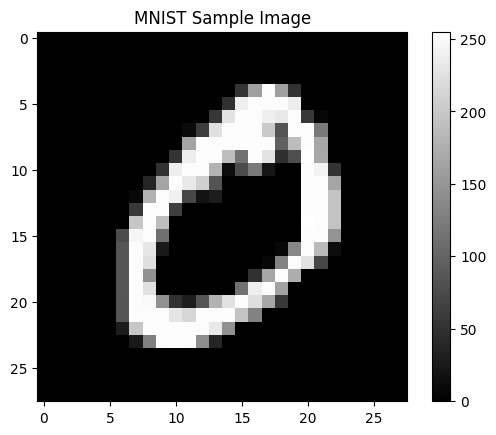

print a pixel 0 


In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"3D tensor: Dimentions {train_images.ndim} Shape {train_images.shape} Dtype {train_images.dtype} ")
print(f"Train Lables {train_labels}")
single_image = train_images[1]
print(f"2D tensor {single_image.shape}")
plt.imshow(single_image, cmap='gray')
plt.title('MNIST Sample Image')
plt.colorbar()
plt.show()
print(f"print a pixel {single_image[14,14]} ")

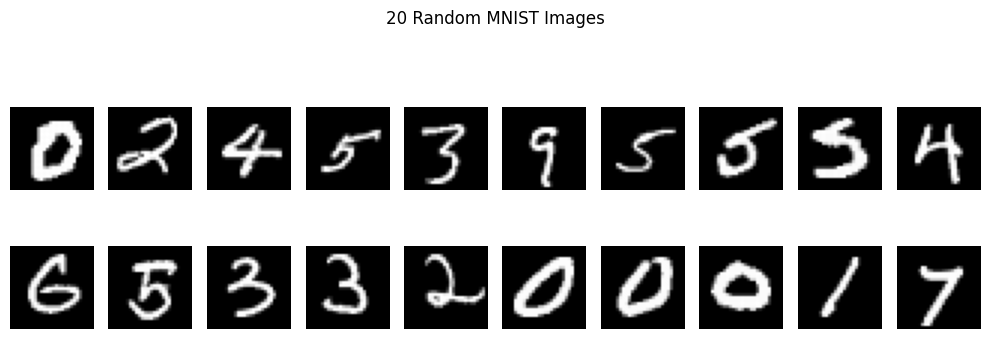

In [ ]:
# Get total images index
total_index = train_images.shape[0]

# Select 20 random indices
random_indices = np.random.choice(total_index, size=20, replace=False)

# Create figure for plotting
fig, axes = plt.subplots(2, 10, figsize=(10, 4))

# Reshape images and plot them
for i, idx in enumerate(random_indices):
    image = train_images[idx].reshape(28, 28)
    axes[int(i / 10), i % 10].imshow(image, cmap="gray")
    axes[int(i / 10), i % 10].axis("off")

# Add title
fig.suptitle("20 Random MNIST Images", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.2166 - loss: 2.0409 - val_accuracy: 0.6393 - val_loss: 1.0179
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6990 - loss: 0.8746 - val_accuracy: 0.8012 - val_loss: 0.6252
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8554 - loss: 0.4738 - val_accuracy: 0.8965 - val_loss: 0.3463
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8913 - loss: 0.3529 - val_accuracy: 0.9189 - val_loss: 0.2777
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9087 - loss: 0.2992 - val_accuracy: 0.9229 - val_loss: 0.2590
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9182 - loss: 0.2716 - val_accuracy: 0.9262 - val_loss: 0.2469
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9247 - loss: 0.2463 - val_accuracy: 0.9275 - val_loss: 0.2370
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9276 - loss: 0.2287 - val

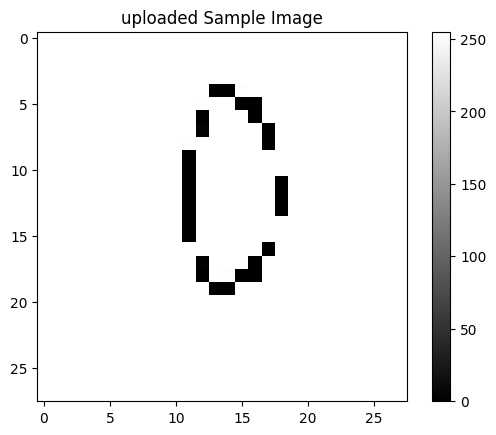

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
pick one by one for Evaluatoin: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] max 5


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# import packages for handling upload image
from tensorflow.keras.preprocessing.image import load_img
import os
import numpy as np

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# manipulate the dataset
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
# start to train
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

#basic evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

#evaluate recall, precision, F1, AUC
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
# Make predictions on the test set
predictions = model.predict(test_images)

# Get the predicted classes (the one with the highest probability)
predicted_classes = np.argmax(predictions, axis=1)
# Print classification report (includes Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes))

# Calculate and print AUC (One-vs-Rest)
auc_score = roc_auc_score(test_labels, predictions, multi_class='ovr')
print(f"\nAUC (One-vs-Rest): {auc_score}")


#evaluate single one image
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
print(f"pick first 10 for Evaluatoin: {predictions[0]} max {predictions[0].argmax()}")
print(f"Lable of max argument: {test_labels[0]} ")


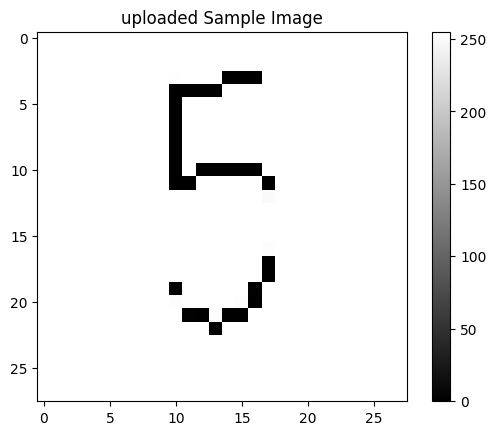

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
pick one by one for Evaluatoin: [0.0000000e+00 0.0000000e+00 0.0000000e+00 8.5041626e-07 0.0000000e+00
 9.9999917e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00] max 5


In [ ]:
# predict your own image
file_path = '/content/digit5.jpg'
  # Load the image using Keras preprocessing
image = load_img(file_path, color_mode = "grayscale", target_size=(28, 28))
plt.imshow(image, cmap='gray')
plt.title('uploaded Sample Image')
plt.colorbar()
plt.show()
image_array = np.array(image)  # Convert to array
image_array = image_array.reshape((1, 28 * 28))
image_array = image_array.astype("float32") / 255
predictions2 = model.predict(image_array )
print(f"pick one by one for Evaluatoin: {predictions2[0]} max {predictions2[0].argmax()}")